### IBM HR Analytics Employee Attrition & Performance


***Need for HR Analytics:***


*HR analytics is the systematic identification and quantification of the people drivers of business outcomes (Heuvel & Bondarouk, 2016).*

Analytics is always an important topic and trend in every part of business and HR is also not far behind. 
Human Resources analytics provides an organization with insights for effectively managing employees so that business goals can be reached quickly and efficiently. By accurately predicting attrition risks of current employees, you can take real steps to keep your talent happy, engaged, and less susceptible to competitive overtures. 


<img src="https://d35kskn2b3gqvv.cloudfront.net/wp-content/uploads/2016/10/13.png" />





***Scope***

Through this project we will uncover the factors that may lead to employee attrition and build a predctive machine learning model to identify employees that may leave the company. 

This is a fictional data set created by IBM data scientists and can be found on Kaggle __[here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home)__






***Import the necessary Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

***Load the Data Set and let's have a peek at the data***

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

#The data consists of levels for a few features. The levels for these features are as follows:

#Education                1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
#EnvironmentSatisfaction  1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobInvolvement           1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobSatisfaction          1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#PerformanceRating        1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
#RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#WorkLifeBalance          1 'Bad' 2 'Good' 3 'Better' 4 'Best'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:

# By taking a glance at our dataset, we can observe that there are 34 features and 1 target variable: "Attrition". 
# We can start asking questions relating to employee attrition such as: 
# 1) Is distance from home a factor in employee attrition? 
# 2) Does Marital status play a role in employee attrition? 
# 3) Do Employees get frequent training to cope with the job? 



***Data Exploration*** 

It is a good practice to perform some data exploration to get a better understanding our data set. <br>

Lets perform some data visualizations using the matplotlib and seaborn pakages

In [4]:
# Are there any missing  values? 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

We do not have any missing values. However, our data has a mix of numeric and categorical features. Therefore, we have to remember to convert our categorical features to numerics while training our predictive machine learning model later.  

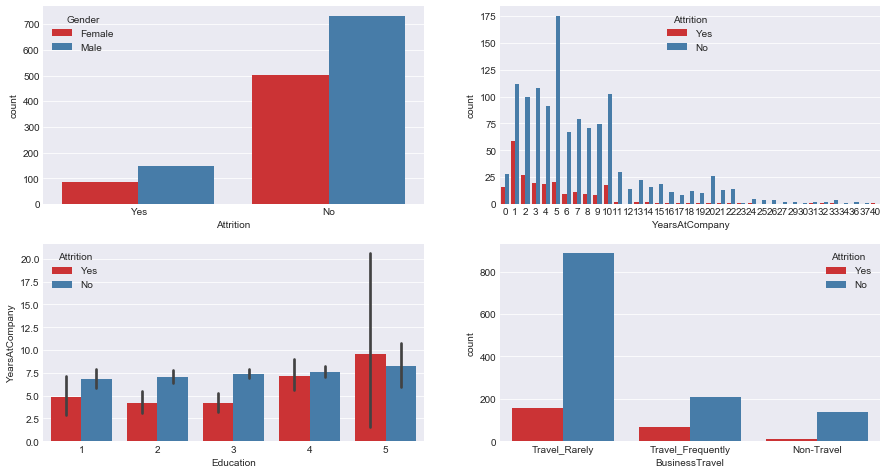

In [5]:
# Lets what are some of the factors are affecting the employees to leave the organization. 

sns.set_style('darkgrid')

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.countplot(data['Attrition'], hue=data['Gender'], palette='Set1',ax=ax1)
sns.countplot(data['YearsAtCompany'], hue=data['Attrition'], palette='Set1', ax=ax2)
sns.barplot(data['Education'], data['YearsAtCompany'], hue=data['Attrition'],palette='Set1', ax=ax3)
sns.countplot(data['BusinessTravel'], hue=data['Attrition'], palette='Set1', ax=ax4)


# Observations from the plots: 

# Plot 1: Our data set shows us that the number of male employees leaving the organization is higher that the female employees

# Plot 2: The attrition rate is low for the employees spending more than 10 years at the company. 

# Plot 3: Employees with a doctorate degree tend to leave the company more than employees with lower degrees. 

# Plot 4: Employees who travel rarely are leaving the company more than employees who do not travel or travel frequently. 


***Some more exploratory analysis***

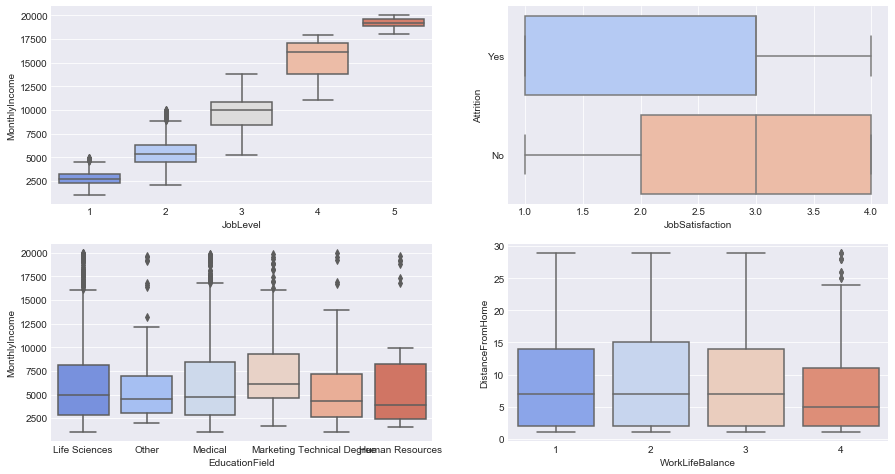

In [6]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(data['JobLevel'], data['MonthlyIncome'], palette='coolwarm', ax=ax1)
sns.boxplot(data['JobSatisfaction'], data['Attrition'], palette='coolwarm', ax=ax2)
sns.boxplot(data['EducationField'], data['MonthlyIncome'], palette='coolwarm', ax=ax3)
sns.boxplot(data['WorkLifeBalance'], data['DistanceFromHome'], palette='coolwarm', ax=ax4)


# Observations from the plots: 

# Plot 1: As an employees job level increases his average monthly income also increases. 

# Plot 2: Employees with lower job satisfaction are leaving the company more. 

# Plot 3: The average monthly salary of employees in marketing is higher than other employees. 

# Plot 4: Employees staying closer to the work place have higher rating in work life balance. 


***Predicting Employee Attrition***

Our objective is to predict employee attrition. So, this is a classification problem. 

***Classification***

Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. <br>

Classification is 

As our data consists of numerical and categorical data we need to treat them diferently. 
Lets start with finding the correlation between our numerical features. 

In [7]:
numerical_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

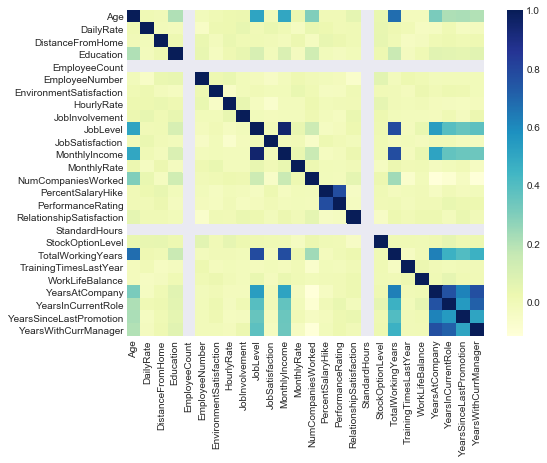

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(numerical_data.corr(), cmap='YlGnBu')

From the above correlation plot we can observe that we have poorly correlated(values towards 0) and strongly correlated (values towards 1) features. 
Our model should be trained on as many poorly correlated features as possible to get a better prediction. We can remove the strongly correlated features from the data so that the model can train better. 

In [9]:
numerical_data = numerical_data.drop(['YearsAtCompany', 'YearsInCurrentRole',
                           'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating'], axis=1)

Lets turn our attention to the categorical variables. As our machine learning model needs numerical data as an input, we need to convert our categorical features into numerical ones. 

In [10]:
# Attrition consists of 'Yes' and 'No'. Lets change that to 1 and 0. 
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
categorical_data['Attrition'] = categorical_data["Attrition"].apply(lambda x: target_map[x])


In [11]:
# Now lets convert the rest of the categorical features using pandas get_dummies to not fall into the dummy variable trap. 
categorical_data = pd.get_dummies(categorical_data)

In [12]:
# Now we combine our numerical and categorical data to create a final data frame to train our model upon. 

final_data = pd.concat([numerical_data, categorical_data], axis=1)

In [13]:
final_data.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


***Feature Selection and Engineering***




We can remove some of the below features from our data as they do not provide any predictive value for our model. <br>

EmployeeCount = Variable that just counts employees, No predictive Value<br>
EmployeeNumber = Unique ID for employee, No Predictive Value <br>
StandardHours = All were 80, No Predictive Value




In [14]:
final_data = final_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

***Model building***

We will try a few classification techniques as well as an artificial neural network. 

In [15]:
# Import of necessary modules

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

z:\ms\anaconda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Split the data into training data and testing data

x = final_data.drop('Attrition', axis=1) # Features
y = final_data['Attrition'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)



In [17]:
# Lets call our classifiers

rf_model = RandomForestClassifier()
log_model = LogisticRegression()
dec_model = DecisionTreeClassifier()
svc_model = SVC()


In [21]:
models = ['Random Forest Classifier', 'Logistic Regression Classifier', 'Decision Tree Classifier', 'Support Vector Classifier']
classifiers = [rf_model, log_model, dec_model, svc_model]
model_acc = []

In [22]:
# Lets build our models on our training data

for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred)
    model_acc.append(acc)

    
for i,j in zip(models, model_acc):
    print('Accuracy of {} : {}'.format(i,j))

Accuracy of Random Forest Classifier : 0.8798185941043084
Accuracy of Logistic Regression Classifier : 0.8752834467120182
Accuracy of Decision Tree Classifier : 0.7959183673469388
Accuracy of Support Vector Classifier : 0.8616780045351474


In [23]:
from sklearn.cross_validation import cross_val_score

In [24]:
for i,j in zip(models, classifiers):
    a = cross_val_score(estimator = j, X=x_train, y=y_train, cv=10)
    print('{} : {}'.format(i, a.mean()))

Random Forest Classifier : 0.8464509291393929
Logistic Regression Classifier : 0.8620616058223141
Decision Tree Classifier : 0.7657313037238793
Support Vector Classifier : 0.8289830719442369


In [25]:
# Let us try to perform some parameter tuning and see if we can better the accuracy of our best performing classifier

from sklearn.model_selection import GridSearchCV

In [26]:
penalty = ['l1', 'l2']

C = [0.1,1,10,100,1000]

params = {'C':C, 'penalty':penalty}

In [27]:
grid_clf = GridSearchCV(estimator=log_model, param_grid=params, scoring='accuracy', cv=10)


In [28]:
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
print('Best parameters : ',grid_clf.best_params_)
print('Best Score: ',grid_clf.best_score_)

Best parameters :  {'C': 1, 'penalty': 'l1'}
Best Score:  0.8717201166180758


In [30]:
p = grid_clf.predict(x_test)

In [31]:
print(confusion_matrix(y_test, p))

[[362  18]
 [ 39  22]]


In [32]:
print(accuracy_score(y_test, p))

0.8707482993197279


Looks like our Logistic Regression classifier is performing consistently on unseen data as well. We are consistently getting accuracy around 87% for our logistic regression model. 

***Artificial Neural Network using Keras***

Lets us try to implement a Artificial neural network using keras and see if our accuracy scores can increase 


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [34]:
final_data.shape

(1470, 47)

In [35]:
# Building the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense


def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 24, kernel_initializer = 'normal', activation = 'linear', input_dim = 46))
    classifier.add(Dense(units = 24, kernel_initializer = 'normal', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Tuning the ANN 

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 20],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4)
grid_search = grid_search.fit(X_train, y_train)


Using TensorFlow backend.


Epoch 1/50
771/771 [==============================] - 2s 3ms/step - loss: 0.6455 - acc: 0.7964
Epoch 2/50
771/771 [==============================] - 0s 602us/step - loss: 0.4320 - acc: 0.8223
Epoch 3/50
771/771 [==============================] - 0s 622us/step - loss: 0.3656 - acc: 0.8301
Epoch 4/50
771/771 [==============================] - 0s 585us/step - loss: 0.3546 - acc: 0.8353
Epoch 5/50
771/771 [==============================] - 0s 547us/step - loss: 0.3464 - acc: 0.8586
Epoch 6/50
771/771 [==============================] - 0s 562us/step - loss: 0.3335 - acc: 0.8703
Epoch 7/50
771/771 [==============================] - 0s 498us/step - loss: 0.3211 - acc: 0.8820
Epoch 8/50
771/771 [==============================] - 0s 500us/step - loss: 0.3098 - acc: 0.8820
Epoch 9/50
771/771 [==============================] - 0s 512us/step - loss: 0.3024 - acc: 0.8898
Epoch 10/50
771/771 [==============================] - 0s 496us/step - loss: 0.2944 - acc: 0.8936
Epoch 11/50
771/771 [==========

772/772 [==============================] - 0s 287us/step - loss: 0.2020 - acc: 0.9210
Epoch 35/50
772/772 [==============================] - 0s 288us/step - loss: 0.2061 - acc: 0.9171
Epoch 36/50
772/772 [==============================] - 0s 292us/step - loss: 0.2001 - acc: 0.9184
Epoch 37/50
772/772 [==============================] - 0s 294us/step - loss: 0.1972 - acc: 0.9236
Epoch 38/50
772/772 [==============================] - 0s 288us/step - loss: 0.1969 - acc: 0.9197
Epoch 39/50
772/772 [==============================] - 0s 270us/step - loss: 0.1947 - acc: 0.9262
Epoch 40/50
772/772 [==============================] - 0s 262us/step - loss: 0.1935 - acc: 0.9236
Epoch 41/50
772/772 [==============================] - 0s 286us/step - loss: 0.1889 - acc: 0.9275
Epoch 42/50
772/772 [==============================] - 0s 298us/step - loss: 0.1877 - acc: 0.9275
Epoch 43/50
772/772 [==============================] - 0s 300us/step - loss: 0.1878 - acc: 0.9249
Epoch 44/50
772/772 [===========

772/772 [==============================] - 0s 388us/step - loss: 0.2610 - acc: 0.9016
Epoch 17/50
772/772 [==============================] - 0s 326us/step - loss: 0.2548 - acc: 0.9003
Epoch 18/50
772/772 [==============================] - 0s 348us/step - loss: 0.2542 - acc: 0.9080
Epoch 19/50
772/772 [==============================] - 0s 363us/step - loss: 0.2485 - acc: 0.9054
Epoch 20/50
772/772 [==============================] - 0s 451us/step - loss: 0.2441 - acc: 0.9028
Epoch 21/50
772/772 [==============================] - 0s 313us/step - loss: 0.2403 - acc: 0.9016
Epoch 22/50
772/772 [==============================] - 0s 305us/step - loss: 0.2426 - acc: 0.9003
Epoch 23/50
772/772 [==============================] - 0s 320us/step - loss: 0.2366 - acc: 0.9028
Epoch 24/50
772/772 [==============================] - 0s 362us/step - loss: 0.2335 - acc: 0.9054
Epoch 25/50
772/772 [==============================] - 0s 289us/step - loss: 0.2331 - acc: 0.9080
Epoch 26/50
772/772 [===========

771/771 [==============================] - 0s 261us/step - loss: 0.2283 - acc: 0.9053
Epoch 50/50
771/771 [==============================] - 0s 292us/step - loss: 0.2277 - acc: 0.9118
Epoch 1/50
772/772 [==============================] - 1s 2ms/step - loss: 0.6296 - acc: 0.8135
Epoch 2/50
772/772 [==============================] - 0s 375us/step - loss: 0.4560 - acc: 0.8368
Epoch 3/50
772/772 [==============================] - 0s 378us/step - loss: 0.3682 - acc: 0.8472
Epoch 4/50
772/772 [==============================] - 0s 379us/step - loss: 0.3462 - acc: 0.8549
Epoch 5/50
772/772 [==============================] - 0s 411us/step - loss: 0.3352 - acc: 0.8795
Epoch 6/50
772/772 [==============================] - 0s 424us/step - loss: 0.3243 - acc: 0.8873
Epoch 7/50
772/772 [==============================] - 0s 361us/step - loss: 0.3127 - acc: 0.8964
Epoch 8/50
772/772 [==============================] - 0s 501us/step - loss: 0.3074 - acc: 0.8860
Epoch 9/50
772/772 [======================

772/772 [==============================] - 0s 319us/step - loss: 0.2371 - acc: 0.9093
Epoch 32/50
772/772 [==============================] - 0s 374us/step - loss: 0.2316 - acc: 0.9093
Epoch 33/50
772/772 [==============================] - 0s 317us/step - loss: 0.2310 - acc: 0.9054
Epoch 34/50
772/772 [==============================] - 0s 317us/step - loss: 0.2283 - acc: 0.9132
Epoch 35/50
772/772 [==============================] - 0s 280us/step - loss: 0.2258 - acc: 0.9158
Epoch 36/50
772/772 [==============================] - 0s 279us/step - loss: 0.2236 - acc: 0.9132
Epoch 37/50
772/772 [==============================] - 0s 311us/step - loss: 0.2233 - acc: 0.9093
Epoch 38/50
772/772 [==============================] - 0s 363us/step - loss: 0.2204 - acc: 0.9171
Epoch 39/50
772/772 [==============================] - 0s 389us/step - loss: 0.2171 - acc: 0.9145
Epoch 40/50
772/772 [==============================] - 0s 341us/step - loss: 0.2153 - acc: 0.9158
Epoch 41/50
772/772 [===========

771/771 [==============================] - 0s 347us/step - loss: 0.2777 - acc: 0.8911
Epoch 15/100
771/771 [==============================] - 0s 321us/step - loss: 0.2718 - acc: 0.8923
Epoch 16/100
771/771 [==============================] - 0s 323us/step - loss: 0.2698 - acc: 0.8949
Epoch 17/100
771/771 [==============================] - 0s 323us/step - loss: 0.2651 - acc: 0.8975
Epoch 18/100
771/771 [==============================] - 0s 347us/step - loss: 0.2656 - acc: 0.8962
Epoch 19/100
771/771 [==============================] - 0s 301us/step - loss: 0.2621 - acc: 0.8975
Epoch 20/100
771/771 [==============================] - 0s 364us/step - loss: 0.2588 - acc: 0.8975 0s - loss: 0.2826 - acc: 0.
Epoch 21/100
771/771 [==============================] - 0s 323us/step - loss: 0.2564 - acc: 0.9040
Epoch 22/100
771/771 [==============================] - 0s 330us/step - loss: 0.2556 - acc: 0.8936
Epoch 23/100
771/771 [==============================] - 0s 331us/step - loss: 0.2544 - acc: 0.

771/771 [==============================] - 0s 273us/step - loss: 0.1723 - acc: 0.9326
Epoch 97/100
771/771 [==============================] - 0s 297us/step - loss: 0.1741 - acc: 0.9248
Epoch 98/100
771/771 [==============================] - 0s 297us/step - loss: 0.1686 - acc: 0.9300
Epoch 99/100
771/771 [==============================] - 0s 304us/step - loss: 0.1718 - acc: 0.9339
Epoch 100/100
771/771 [==============================] - 0s 316us/step - loss: 0.1718 - acc: 0.9287
Epoch 1/100
772/772 [==============================] - 2s 2ms/step - loss: 0.6442 - acc: 0.8083
Epoch 2/100
772/772 [==============================] - 0s 431us/step - loss: 0.4234 - acc: 0.8368
Epoch 3/100
772/772 [==============================] - 0s 432us/step - loss: 0.3536 - acc: 0.8381
Epoch 4/100
772/772 [==============================] - 0s 444us/step - loss: 0.3339 - acc: 0.8731
Epoch 5/100
772/772 [==============================] - 0s 426us/step - loss: 0.3154 - acc: 0.8847
Epoch 6/100
772/772 [========

772/772 [==============================] - 0s 285us/step - loss: 0.1409 - acc: 0.9404
Epoch 79/100
772/772 [==============================] - 0s 265us/step - loss: 0.1384 - acc: 0.9495
Epoch 80/100
772/772 [==============================] - 0s 280us/step - loss: 0.1391 - acc: 0.9430
Epoch 81/100
772/772 [==============================] - 0s 296us/step - loss: 0.1453 - acc: 0.9443
Epoch 82/100
772/772 [==============================] - 0s 307us/step - loss: 0.1381 - acc: 0.9508
Epoch 83/100
772/772 [==============================] - 0s 292us/step - loss: 0.1366 - acc: 0.9443
Epoch 84/100
772/772 [==============================] - 0s 292us/step - loss: 0.1355 - acc: 0.9443
Epoch 85/100
772/772 [==============================] - 0s 301us/step - loss: 0.1332 - acc: 0.9508
Epoch 86/100
772/772 [==============================] - 0s 313us/step - loss: 0.1326 - acc: 0.9443
Epoch 87/100
772/772 [==============================] - 0s 324us/step - loss: 0.1338 - acc: 0.9508
Epoch 88/100
772/772 [=

772/772 [==============================] - 0s 272us/step - loss: 0.2073 - acc: 0.9197
Epoch 61/100
772/772 [==============================] - 0s 266us/step - loss: 0.2071 - acc: 0.9210
Epoch 62/100
772/772 [==============================] - 0s 282us/step - loss: 0.2063 - acc: 0.9119
Epoch 63/100
772/772 [==============================] - 0s 281us/step - loss: 0.2064 - acc: 0.9145
Epoch 64/100
772/772 [==============================] - 0s 283us/step - loss: 0.2162 - acc: 0.9054
Epoch 65/100
772/772 [==============================] - 0s 293us/step - loss: 0.2026 - acc: 0.9132
Epoch 66/100
772/772 [==============================] - 0s 310us/step - loss: 0.2003 - acc: 0.9132
Epoch 67/100
772/772 [==============================] - 0s 310us/step - loss: 0.1964 - acc: 0.9158
Epoch 68/100
772/772 [==============================] - 0s 320us/step - loss: 0.1940 - acc: 0.9197
Epoch 69/100
772/772 [==============================] - 0s 306us/step - loss: 0.1943 - acc: 0.9197
Epoch 70/100
772/772 [=

772/772 [==============================] - 0s 340us/step - loss: 0.1966 - acc: 0.9132
Epoch 43/100
772/772 [==============================] - 0s 355us/step - loss: 0.1964 - acc: 0.9171
Epoch 44/100
772/772 [==============================] - 0s 349us/step - loss: 0.1926 - acc: 0.9119
Epoch 45/100
772/772 [==============================] - 0s 354us/step - loss: 0.1900 - acc: 0.9132
Epoch 46/100
772/772 [==============================] - 0s 330us/step - loss: 0.1914 - acc: 0.9158
Epoch 47/100
772/772 [==============================] - 0s 341us/step - loss: 0.1901 - acc: 0.9119
Epoch 48/100
772/772 [==============================] - 0s 368us/step - loss: 0.1892 - acc: 0.9184
Epoch 49/100
772/772 [==============================] - 0s 345us/step - loss: 0.1872 - acc: 0.9132
Epoch 50/100
772/772 [==============================] - 0s 368us/step - loss: 0.1846 - acc: 0.9145
Epoch 51/100
772/772 [==============================] - 0s 339us/step - loss: 0.1870 - acc: 0.9132
Epoch 52/100
772/772 [=

771/771 [==============================] - 0s 287us/step - loss: 0.2663 - acc: 0.8975
Epoch 25/100
771/771 [==============================] - 0s 270us/step - loss: 0.2629 - acc: 0.9001
Epoch 26/100
771/771 [==============================] - 0s 265us/step - loss: 0.2617 - acc: 0.9053
Epoch 27/100
771/771 [==============================] - 0s 282us/step - loss: 0.2627 - acc: 0.8988
Epoch 28/100
771/771 [==============================] - 0s 288us/step - loss: 0.2605 - acc: 0.9053
Epoch 29/100
771/771 [==============================] - 0s 318us/step - loss: 0.2584 - acc: 0.9014
Epoch 30/100
771/771 [==============================] - 0s 312us/step - loss: 0.2565 - acc: 0.9014
Epoch 31/100
771/771 [==============================] - 0s 322us/step - loss: 0.2558 - acc: 0.9001
Epoch 32/100
771/771 [==============================] - 0s 327us/step - loss: 0.2527 - acc: 0.9066
Epoch 33/100
771/771 [==============================] - 0s 334us/step - loss: 0.2548 - acc: 0.9001
Epoch 34/100
771/771 [=

772/772 [==============================] - 0s 365us/step - loss: 0.3206 - acc: 0.8769
Epoch 6/100
772/772 [==============================] - 0s 310us/step - loss: 0.3102 - acc: 0.8756
Epoch 7/100
772/772 [==============================] - 0s 301us/step - loss: 0.3070 - acc: 0.8847
Epoch 8/100
772/772 [==============================] - 0s 315us/step - loss: 0.3013 - acc: 0.8847
Epoch 9/100
772/772 [==============================] - 0s 345us/step - loss: 0.2949 - acc: 0.8951
Epoch 10/100
772/772 [==============================] - 0s 320us/step - loss: 0.2929 - acc: 0.8951
Epoch 11/100
772/772 [==============================] - 0s 322us/step - loss: 0.2926 - acc: 0.8847
Epoch 12/100
772/772 [==============================] - 0s 332us/step - loss: 0.2863 - acc: 0.8886
Epoch 13/100
772/772 [==============================] - 0s 340us/step - loss: 0.2872 - acc: 0.8912
Epoch 14/100
772/772 [==============================] - 0s 305us/step - loss: 0.2820 - acc: 0.8938
Epoch 15/100
772/772 [=====

Epoch 87/100
772/772 [==============================] - 0s 292us/step - loss: 0.1650 - acc: 0.9391
Epoch 88/100
772/772 [==============================] - 0s 307us/step - loss: 0.1636 - acc: 0.9365
Epoch 89/100
772/772 [==============================] - 0s 333us/step - loss: 0.1603 - acc: 0.9417
Epoch 90/100
772/772 [==============================] - 0s 305us/step - loss: 0.1584 - acc: 0.9417
Epoch 91/100
772/772 [==============================] - 0s 310us/step - loss: 0.1559 - acc: 0.9365
Epoch 92/100
772/772 [==============================] - 0s 298us/step - loss: 0.1579 - acc: 0.9365
Epoch 93/100
772/772 [==============================] - 0s 324us/step - loss: 0.1513 - acc: 0.9391
Epoch 94/100
772/772 [==============================] - 0s 307us/step - loss: 0.1541 - acc: 0.9443
Epoch 95/100
772/772 [==============================] - 0s 297us/step - loss: 0.1474 - acc: 0.9469
Epoch 96/100
772/772 [==============================] - 0s 288us/step - loss: 0.1541 - acc: 0.9417
Epoch 97/1

772/772 [==============================] - 0s 263us/step - loss: 0.1648 - acc: 0.9365
Epoch 70/100
772/772 [==============================] - 0s 289us/step - loss: 0.1626 - acc: 0.9378
Epoch 71/100
772/772 [==============================] - 0s 294us/step - loss: 0.1629 - acc: 0.9391
Epoch 72/100
772/772 [==============================] - ETA: 0s - loss: 0.1500 - acc: 0.940 - 0s 296us/step - loss: 0.1610 - acc: 0.9365
Epoch 73/100
772/772 [==============================] - 0s 301us/step - loss: 0.1598 - acc: 0.9365
Epoch 74/100
772/772 [==============================] - 0s 296us/step - loss: 0.1592 - acc: 0.9391
Epoch 75/100
772/772 [==============================] - 0s 324us/step - loss: 0.1565 - acc: 0.9430
Epoch 76/100
772/772 [==============================] - 0s 289us/step - loss: 0.1550 - acc: 0.9404
Epoch 77/100
772/772 [==============================] - 0s 300us/step - loss: 0.1525 - acc: 0.9495
Epoch 78/100
772/772 [==============================] - 0s 310us/step - loss: 0.1509

772/772 [==============================] - 0s 347us/step - loss: 0.2158 - acc: 0.9106
Epoch 52/100
772/772 [==============================] - 0s 308us/step - loss: 0.2153 - acc: 0.9106
Epoch 53/100
772/772 [==============================] - 0s 340us/step - loss: 0.2123 - acc: 0.9119
Epoch 54/100
772/772 [==============================] - 0s 299us/step - loss: 0.2115 - acc: 0.9158
Epoch 55/100
772/772 [==============================] - 0s 327us/step - loss: 0.2109 - acc: 0.9197
Epoch 56/100
772/772 [==============================] - 0s 305us/step - loss: 0.2102 - acc: 0.9119
Epoch 57/100
772/772 [==============================] - 0s 320us/step - loss: 0.2115 - acc: 0.9145
Epoch 58/100
772/772 [==============================] - 0s 326us/step - loss: 0.2084 - acc: 0.9158
Epoch 59/100
772/772 [==============================] - 0s 327us/step - loss: 0.2101 - acc: 0.9171
Epoch 60/100
772/772 [==============================] - 0s 312us/step - loss: 0.2059 - acc: 0.9158
Epoch 61/100
772/772 [=

771/771 [==============================] - 0s 202us/step - loss: 0.2435 - acc: 0.8936
Epoch 35/50
771/771 [==============================] - 0s 194us/step - loss: 0.2435 - acc: 0.8936
Epoch 36/50
771/771 [==============================] - 0s 197us/step - loss: 0.2416 - acc: 0.8975
Epoch 37/50
771/771 [==============================] - 0s 208us/step - loss: 0.2404 - acc: 0.9001
Epoch 38/50
771/771 [==============================] - 0s 196us/step - loss: 0.2381 - acc: 0.8936
Epoch 39/50
771/771 [==============================] - 0s 196us/step - loss: 0.2377 - acc: 0.9001
Epoch 40/50
771/771 [==============================] - 0s 196us/step - loss: 0.2344 - acc: 0.8962
Epoch 41/50
771/771 [==============================] - 0s 206us/step - loss: 0.2354 - acc: 0.8962
Epoch 42/50
771/771 [==============================] - 0s 194us/step - loss: 0.2363 - acc: 0.8949
Epoch 43/50
771/771 [==============================] - 0s 204us/step - loss: 0.2360 - acc: 0.8911
Epoch 44/50
771/771 [===========

772/772 [==============================] - 0s 194us/step - loss: 0.2654 - acc: 0.8925
Epoch 18/50
772/772 [==============================] - 0s 192us/step - loss: 0.2616 - acc: 0.9016
Epoch 19/50
772/772 [==============================] - 0s 196us/step - loss: 0.2593 - acc: 0.8990
Epoch 20/50
772/772 [==============================] - 0s 203us/step - loss: 0.2552 - acc: 0.8925
Epoch 21/50
772/772 [==============================] - 0s 201us/step - loss: 0.2515 - acc: 0.9016
Epoch 22/50
772/772 [==============================] - 0s 199us/step - loss: 0.2487 - acc: 0.9041
Epoch 23/50
772/772 [==============================] - 0s 197us/step - loss: 0.2461 - acc: 0.9003
Epoch 24/50
772/772 [==============================] - 0s 195us/step - loss: 0.2424 - acc: 0.9028
Epoch 25/50
772/772 [==============================] - 0s 200us/step - loss: 0.2408 - acc: 0.9003
Epoch 26/50
772/772 [==============================] - 0s 199us/step - loss: 0.2391 - acc: 0.9041
Epoch 27/50
772/772 [===========

772/772 [==============================] - 0s 168us/step - loss: 0.1841 - acc: 0.9301
Epoch 1/50
771/771 [==============================] - 2s 3ms/step - loss: 0.6524 - acc: 0.8132
Epoch 2/50
771/771 [==============================] - 0s 202us/step - loss: 0.5308 - acc: 0.8210
Epoch 3/50
771/771 [==============================] - 0s 194us/step - loss: 0.4341 - acc: 0.8210
Epoch 4/50
771/771 [==============================] - 0s 197us/step - loss: 0.3927 - acc: 0.8223
Epoch 5/50
771/771 [==============================] - 0s 194us/step - loss: 0.3682 - acc: 0.8301
Epoch 6/50
771/771 [==============================] - 0s 204us/step - loss: 0.3512 - acc: 0.8457
Epoch 7/50
771/771 [==============================] - 0s 201us/step - loss: 0.3398 - acc: 0.8664
Epoch 8/50
771/771 [==============================] - 0s 198us/step - loss: 0.3304 - acc: 0.8586
Epoch 9/50
771/771 [==============================] - 0s 200us/step - loss: 0.3222 - acc: 0.8729
Epoch 10/50
771/771 [======================

772/772 [==============================] - 0s 195us/step - loss: 0.2486 - acc: 0.9016
Epoch 34/50
772/772 [==============================] - 0s 198us/step - loss: 0.2483 - acc: 0.9067
Epoch 35/50
772/772 [==============================] - 0s 201us/step - loss: 0.2461 - acc: 0.9028
Epoch 36/50
772/772 [==============================] - 0s 193us/step - loss: 0.2446 - acc: 0.9080
Epoch 37/50
772/772 [==============================] - 0s 201us/step - loss: 0.2441 - acc: 0.9003
Epoch 38/50
772/772 [==============================] - 0s 203us/step - loss: 0.2437 - acc: 0.9028
Epoch 39/50
772/772 [==============================] - 0s 207us/step - loss: 0.2423 - acc: 0.9093
Epoch 40/50
772/772 [==============================] - 0s 197us/step - loss: 0.2385 - acc: 0.9080
Epoch 41/50
772/772 [==============================] - 0s 212us/step - loss: 0.2380 - acc: 0.9093
Epoch 42/50
772/772 [==============================] - 0s 204us/step - loss: 0.2378 - acc: 0.9093
Epoch 43/50
772/772 [===========

772/772 [==============================] - 0s 173us/step - loss: 0.2848 - acc: 0.8873
Epoch 17/50
772/772 [==============================] - 0s 223us/step - loss: 0.2834 - acc: 0.8847
Epoch 18/50
772/772 [==============================] - 0s 179us/step - loss: 0.2789 - acc: 0.8899
Epoch 19/50
772/772 [==============================] - 0s 184us/step - loss: 0.2774 - acc: 0.8899
Epoch 20/50
772/772 [==============================] - 0s 183us/step - loss: 0.2768 - acc: 0.8847
Epoch 21/50
772/772 [==============================] - 0s 199us/step - loss: 0.2746 - acc: 0.8925
Epoch 22/50
772/772 [==============================] - 0s 225us/step - loss: 0.2709 - acc: 0.8899
Epoch 23/50
772/772 [==============================] - 0s 175us/step - loss: 0.2702 - acc: 0.8938
Epoch 24/50
772/772 [==============================] - 0s 170us/step - loss: 0.2682 - acc: 0.8925
Epoch 25/50
772/772 [==============================] - 0s 192us/step - loss: 0.2674 - acc: 0.8886
Epoch 26/50
772/772 [===========

771/771 [==============================] - 0s 192us/step - loss: 0.2168 - acc: 0.9144
Epoch 50/100
771/771 [==============================] - 0s 193us/step - loss: 0.2175 - acc: 0.9105
Epoch 51/100
771/771 [==============================] - 0s 236us/step - loss: 0.2138 - acc: 0.9157
Epoch 52/100
771/771 [==============================] - 0s 328us/step - loss: 0.2162 - acc: 0.9118
Epoch 53/100
771/771 [==============================] - 0s 215us/step - loss: 0.2136 - acc: 0.9118
Epoch 54/100
771/771 [==============================] - 0s 185us/step - loss: 0.2119 - acc: 0.9118
Epoch 55/100
771/771 [==============================] - 0s 171us/step - loss: 0.2137 - acc: 0.9105
Epoch 56/100
771/771 [==============================] - 0s 187us/step - loss: 0.2106 - acc: 0.9118
Epoch 57/100
771/771 [==============================] - 0s 210us/step - loss: 0.2087 - acc: 0.9131
Epoch 58/100
771/771 [==============================] - 0s 210us/step - loss: 0.2069 - acc: 0.9144
Epoch 59/100
771/771 [=

Epoch 31/100
772/772 [==============================] - 0s 189us/step - loss: 0.2256 - acc: 0.9106
Epoch 32/100
772/772 [==============================] - 0s 200us/step - loss: 0.2220 - acc: 0.9158
Epoch 33/100
772/772 [==============================] - 0s 221us/step - loss: 0.2187 - acc: 0.9145
Epoch 34/100
772/772 [==============================] - 0s 192us/step - loss: 0.2156 - acc: 0.9171
Epoch 35/100
772/772 [==============================] - 0s 229us/step - loss: 0.2136 - acc: 0.9106
Epoch 36/100
772/772 [==============================] - 0s 266us/step - loss: 0.2101 - acc: 0.9197
Epoch 37/100
772/772 [==============================] - 0s 199us/step - loss: 0.2071 - acc: 0.9145
Epoch 38/100
772/772 [==============================] - 0s 144us/step - loss: 0.2038 - acc: 0.9184
Epoch 39/100
772/772 [==============================] - 0s 153us/step - loss: 0.2010 - acc: 0.9197
Epoch 40/100
772/772 [==============================] - 0s 158us/step - loss: 0.1989 - acc: 0.9184
Epoch 41/1

772/772 [==============================] - 0s 196us/step - loss: 0.2885 - acc: 0.8951
Epoch 13/100
772/772 [==============================] - 0s 192us/step - loss: 0.2874 - acc: 0.8951
Epoch 14/100
772/772 [==============================] - 0s 211us/step - loss: 0.2848 - acc: 0.8912
Epoch 15/100
772/772 [==============================] - 0s 224us/step - loss: 0.2823 - acc: 0.8912
Epoch 16/100
772/772 [==============================] - 0s 225us/step - loss: 0.2812 - acc: 0.8925
Epoch 17/100
772/772 [==============================] - 0s 231us/step - loss: 0.2785 - acc: 0.8899
Epoch 18/100
772/772 [==============================] - 0s 239us/step - loss: 0.2773 - acc: 0.8964
Epoch 19/100
772/772 [==============================] - 0s 227us/step - loss: 0.2770 - acc: 0.8886
Epoch 20/100
772/772 [==============================] - 0s 230us/step - loss: 0.2753 - acc: 0.8951
Epoch 21/100
772/772 [==============================] - 0s 234us/step - loss: 0.2727 - acc: 0.8951
Epoch 22/100
772/772 [=

772/772 [==============================] - 0s 225us/step - loss: 0.1930 - acc: 0.9197
Epoch 94/100
772/772 [==============================] - 0s 230us/step - loss: 0.1929 - acc: 0.9249
Epoch 95/100
772/772 [==============================] - 0s 229us/step - loss: 0.1922 - acc: 0.9236
Epoch 96/100
772/772 [==============================] - 0s 225us/step - loss: 0.1921 - acc: 0.9197
Epoch 97/100
772/772 [==============================] - 0s 230us/step - loss: 0.1897 - acc: 0.9210
Epoch 98/100
772/772 [==============================] - 0s 226us/step - loss: 0.1883 - acc: 0.9210
Epoch 99/100
772/772 [==============================] - 0s 227us/step - loss: 0.1872 - acc: 0.9223
Epoch 100/100
772/772 [==============================] - 0s 227us/step - loss: 0.1859 - acc: 0.9249
Epoch 1/100
772/772 [==============================] - 3s 4ms/step - loss: 0.6684 - acc: 0.8083
Epoch 2/100
772/772 [==============================] - 0s 241us/step - loss: 0.5614 - acc: 0.8381
Epoch 3/100
772/772 [=====

Epoch 75/100
772/772 [==============================] - 0s 232us/step - loss: 0.1764 - acc: 0.9262
Epoch 76/100
772/772 [==============================] - 0s 232us/step - loss: 0.1767 - acc: 0.9236
Epoch 77/100
772/772 [==============================] - 0s 231us/step - loss: 0.1741 - acc: 0.9262
Epoch 78/100
772/772 [==============================] - 0s 238us/step - loss: 0.1769 - acc: 0.9288
Epoch 79/100
772/772 [==============================] - 0s 233us/step - loss: 0.1741 - acc: 0.9339
Epoch 80/100
772/772 [==============================] - 0s 223us/step - loss: 0.1732 - acc: 0.9275
Epoch 81/100
772/772 [==============================] - 0s 235us/step - loss: 0.1712 - acc: 0.9313
Epoch 82/100
772/772 [==============================] - 0s 231us/step - loss: 0.1715 - acc: 0.9301
Epoch 83/100
772/772 [==============================] - 0s 237us/step - loss: 0.1715 - acc: 0.9301
Epoch 84/100
772/772 [==============================] - 0s 236us/step - loss: 0.1707 - acc: 0.9326
Epoch 85/1

771/771 [==============================] - 0s 181us/step - loss: 0.2326 - acc: 0.9066
Epoch 58/100
771/771 [==============================] - 0s 174us/step - loss: 0.2273 - acc: 0.9144
Epoch 59/100
771/771 [==============================] - 0s 176us/step - loss: 0.2308 - acc: 0.9131
Epoch 60/100
771/771 [==============================] - 0s 184us/step - loss: 0.2295 - acc: 0.9131
Epoch 61/100
771/771 [==============================] - 0s 219us/step - loss: 0.2278 - acc: 0.9118
Epoch 62/100
771/771 [==============================] - 0s 195us/step - loss: 0.2274 - acc: 0.9092
Epoch 63/100
771/771 [==============================] - 0s 191us/step - loss: 0.2270 - acc: 0.9066
Epoch 64/100
771/771 [==============================] - 0s 164us/step - loss: 0.2282 - acc: 0.9105
Epoch 65/100
771/771 [==============================] - 0s 183us/step - loss: 0.2263 - acc: 0.9092
Epoch 66/100
771/771 [==============================] - 0s 191us/step - loss: 0.2259 - acc: 0.9079
Epoch 67/100
771/771 [=

Epoch 38/100
772/772 [==============================] - 0s 222us/step - loss: 0.2436 - acc: 0.9145
Epoch 39/100
772/772 [==============================] - 0s 237us/step - loss: 0.2419 - acc: 0.9093
Epoch 40/100
772/772 [==============================] - 0s 223us/step - loss: 0.2393 - acc: 0.9184
Epoch 41/100
772/772 [==============================] - 0s 191us/step - loss: 0.2376 - acc: 0.9249
Epoch 42/100
772/772 [==============================] - 0s 190us/step - loss: 0.2343 - acc: 0.9119
Epoch 43/100
772/772 [==============================] - 0s 189us/step - loss: 0.2338 - acc: 0.9184
Epoch 44/100
772/772 [==============================] - 0s 203us/step - loss: 0.2313 - acc: 0.9132
Epoch 45/100
772/772 [==============================] - 0s 229us/step - loss: 0.2302 - acc: 0.9210
Epoch 46/100
772/772 [==============================] - 0s 227us/step - loss: 0.2267 - acc: 0.9184
Epoch 47/100
772/772 [==============================] - 0s 231us/step - loss: 0.2253 - acc: 0.9184
Epoch 48/1

772/772 [==============================] - 0s 234us/step - loss: 0.2784 - acc: 0.8925
Epoch 21/100
772/772 [==============================] - 0s 229us/step - loss: 0.2769 - acc: 0.8951
Epoch 22/100
772/772 [==============================] - 0s 225us/step - loss: 0.2727 - acc: 0.8951
Epoch 23/100
772/772 [==============================] - 0s 227us/step - loss: 0.2726 - acc: 0.8977
Epoch 24/100
772/772 [==============================] - 0s 231us/step - loss: 0.2708 - acc: 0.8964
Epoch 25/100
772/772 [==============================] - 0s 235us/step - loss: 0.2670 - acc: 0.9003
Epoch 26/100
772/772 [==============================] - 0s 238us/step - loss: 0.2671 - acc: 0.9003 0s - loss: 0.2308 - acc: 0.91
Epoch 27/100
772/772 [==============================] - 0s 242us/step - loss: 0.2640 - acc: 0.9028
Epoch 28/100
772/772 [==============================] - 0s 234us/step - loss: 0.2657 - acc: 0.9016
Epoch 29/100
772/772 [==============================] - 0s 233us/step - loss: 0.2620 - acc: 

772/772 [==============================] - 3s 4ms/step - loss: 0.6534 - acc: 0.8199
Epoch 2/100
772/772 [==============================] - 0s 236us/step - loss: 0.5303 - acc: 0.8433
Epoch 3/100
772/772 [==============================] - 0s 250us/step - loss: 0.4152 - acc: 0.8446
Epoch 4/100
772/772 [==============================] - 0s 234us/step - loss: 0.3613 - acc: 0.8640
Epoch 5/100
772/772 [==============================] - 0s 234us/step - loss: 0.3383 - acc: 0.8718
Epoch 6/100
772/772 [==============================] - 0s 246us/step - loss: 0.3245 - acc: 0.8744
Epoch 7/100
772/772 [==============================] - 0s 254us/step - loss: 0.3165 - acc: 0.8821
Epoch 8/100
772/772 [==============================] - 0s 227us/step - loss: 0.3079 - acc: 0.8834
Epoch 9/100
772/772 [==============================] - 0s 233us/step - loss: 0.3023 - acc: 0.8821
Epoch 10/100
772/772 [==============================] - 0s 244us/step - loss: 0.2976 - acc: 0.8886
Epoch 11/100
772/772 [===========

772/772 [==============================] - 0s 227us/step - loss: 0.1801 - acc: 0.9249
Epoch 83/100
772/772 [==============================] - 0s 229us/step - loss: 0.1782 - acc: 0.9223
Epoch 84/100
772/772 [==============================] - 0s 225us/step - loss: 0.1787 - acc: 0.9223
Epoch 85/100
772/772 [==============================] - 0s 233us/step - loss: 0.1765 - acc: 0.9262
Epoch 86/100
772/772 [==============================] - ETA: 0s - loss: 0.1718 - acc: 0.925 - 0s 227us/step - loss: 0.1761 - acc: 0.9236
Epoch 87/100
772/772 [==============================] - 0s 226us/step - loss: 0.1748 - acc: 0.9275
Epoch 88/100
772/772 [==============================] - 0s 225us/step - loss: 0.1748 - acc: 0.9339
Epoch 89/100
772/772 [==============================] - 0s 235us/step - loss: 0.1728 - acc: 0.9249
Epoch 90/100
772/772 [==============================] - 0s 236us/step - loss: 0.1736 - acc: 0.9339
Epoch 91/100
772/772 [==============================] - 0s 236us/step - loss: 0.1710

1029/1029 [==============================] - 0s 241us/step - loss: 0.2357 - acc: 0.9048
Epoch 64/100
1029/1029 [==============================] - 0s 237us/step - loss: 0.2376 - acc: 0.9057
Epoch 65/100
1029/1029 [==============================] - 0s 238us/step - loss: 0.2368 - acc: 0.9077
Epoch 66/100
1029/1029 [==============================] - 0s 241us/step - loss: 0.2349 - acc: 0.9028
Epoch 67/100
1029/1029 [==============================] - 0s 247us/step - loss: 0.2331 - acc: 0.9067
Epoch 68/100
1029/1029 [==============================] - 0s 242us/step - loss: 0.2360 - acc: 0.9038
Epoch 69/100
1029/1029 [==============================] - 0s 231us/step - loss: 0.2326 - acc: 0.9009
Epoch 70/100
1029/1029 [==============================] - 0s 238us/step - loss: 0.2335 - acc: 0.9096
Epoch 71/100
1029/1029 [==============================] - 0s 234us/step - loss: 0.2314 - acc: 0.9048
Epoch 72/100
1029/1029 [==============================] - 0s 234us/step - loss: 0.2312 - acc: 0.9077
Epo

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'batch_size': 20, 'epochs': 100, 'optimizer': 'adam'}
0.8513119533527697


In [100]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units = 23, kernel_initializer = 'normal', activation = 'linear', input_dim = 46))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 23, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


ValueError: Error when checking input: expected dense_133_input to have shape (46,) but got array with shape (44,)

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [39]:
print(confusion_matrix(y_test, y_pred))

[[345  35]
 [ 34  27]]


In [40]:
print(accuracy_score(y_test,y_pred))

0.8435374149659864


In [44]:

#>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
#>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#>>> metrics.auc(fpr, tpr)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)





In [45]:
auc(fpr,tpr)

0.6752588438308887

In [47]:
final_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,1,0


In [53]:
data2 = final_data.copy()

In [72]:
#data2.info()

In [56]:
data2 = data2.drop('Over18_Y', axis=1)

In [57]:
data2 = data2.drop('Gender_Female', axis=1)

In [61]:
# Split the data into training data and testing data

x = data2.drop('Attrition', axis=1) # Features
y = data2['Attrition'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [63]:
data2.shape

(1470, 45)

In [97]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units = 23, kernel_initializer = 'normal', activation = 'linear', input_dim = 44))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 22, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
1029/1029 [==============================] - 6s 6ms/step - loss: 0.6148 - acc: 0.8056
Epoch 2/100
1029/1029 [==============================] - 1s 587us/step - loss: 0.4022 - acc: 0.8319
Epoch 3/100
1029/1029 [==============================] - 1s 600us/step - loss: 0.3555 - acc: 0.8406
Epoch 4/100
1029/1029 [==============================] - 1s 609us/step - loss: 0.3446 - acc: 0.8639
Epoch 5/100
1029/1029 [==============================] - 1s 602us/step - loss: 0.3378 - acc: 0.8630
Epoch 6/100
1029/1029 [==============================] - 1s 606us/step - loss: 0.3248 - acc: 0.8785
Epoch 7/100
1029/1029 [==============================] - 1s 613us/step - loss: 0.3194 - acc: 0.8814
Epoch 8/100
1029/1029 [==============================] - 1s 613us/step - loss: 0.3147 - acc: 0.8805
Epoch 9/100
1029/1029 [==============================] - 1s 609us/step - loss: 0.3039 - acc: 0.8882
Epoch 10/100
1029/1029 [==============================] - 1s 516us/step - loss: 0.3050 - acc: 0.8912
E

1029/1029 [==============================] - 0s 394us/step - loss: 0.2355 - acc: 0.9106
Epoch 82/100
1029/1029 [==============================] - 0s 421us/step - loss: 0.2335 - acc: 0.9038
Epoch 83/100
1029/1029 [==============================] - 0s 424us/step - loss: 0.2328 - acc: 0.9116
Epoch 84/100
1029/1029 [==============================] - 0s 416us/step - loss: 0.2382 - acc: 0.9038
Epoch 85/100
1029/1029 [==============================] - 0s 420us/step - loss: 0.2397 - acc: 0.9057
Epoch 86/100
1029/1029 [==============================] - 0s 415us/step - loss: 0.2313 - acc: 0.9057
Epoch 87/100
1029/1029 [==============================] - 0s 414us/step - loss: 0.2363 - acc: 0.9067
Epoch 88/100
1029/1029 [==============================] - 0s 418us/step - loss: 0.2285 - acc: 0.9077
Epoch 89/100
1029/1029 [==============================] - 0s 418us/step - loss: 0.2257 - acc: 0.9057
Epoch 90/100
1029/1029 [==============================] - 0s 415us/step - loss: 0.2271 - acc: 0.9125
Epo

In [98]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [99]:
print(accuracy_score(y_test, y_pred))

0.8820861678004536


In [101]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr,tpr)

0.6701035375323554

In [102]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       380
          1       0.62      0.38      0.47        61

avg / total       0.87      0.88      0.87       441



In [103]:
print(confusion_matrix(y_test, y_pred))

[[366  14]
 [ 38  23]]
